In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("C:\\Users\\sudha\\Downloads\\salesdata.csv")

In [49]:
df.head()

,Date,Open,High,Low,Close,Volume
0,27-11-2007,770.00,1050.00,770.0,962.90,27294366
1,28-11-2007,984.00,990.00,874.0,893.90,4581338
2,29-11-2007,909.00,914.75,841.0,884.20,5124121
3,30-11-2007,890.00,958.00,890.0,921.55,4609762
4,03-12-2007,939.75,995.00,922.0,969.30,2977470


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3322 non-null   object 
 1   Open    3322 non-null   float64
 2   High    3322 non-null   float64
 3   Low     3322 non-null   float64
 4   Close   3322 non-null   float64
 5   Volume  3322 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 155.8+ KB


In [51]:
df.describe()

,Open,High,Low,Close,Volume
count,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03
mean,344.763019,351.608007,337.531969,344.201626,2.954564e+06
std,193.619992,198.617808,188.676614,193.045886,4.104227e+06
min,108.000000,110.450000,105.650000,108.000000,1.236600e+04
25%,164.850000,168.000000,161.600000,164.312500,7.493682e+05
50%,325.750000,331.275000,319.850000,324.700000,2.007292e+06
75%,401.000000,407.187500,395.000000,400.912500,3.636883e+06
max,1310.250000,1324.000000,1270.000000,1307.450000,9.771788e+07


In [87]:
corr = df.corr()

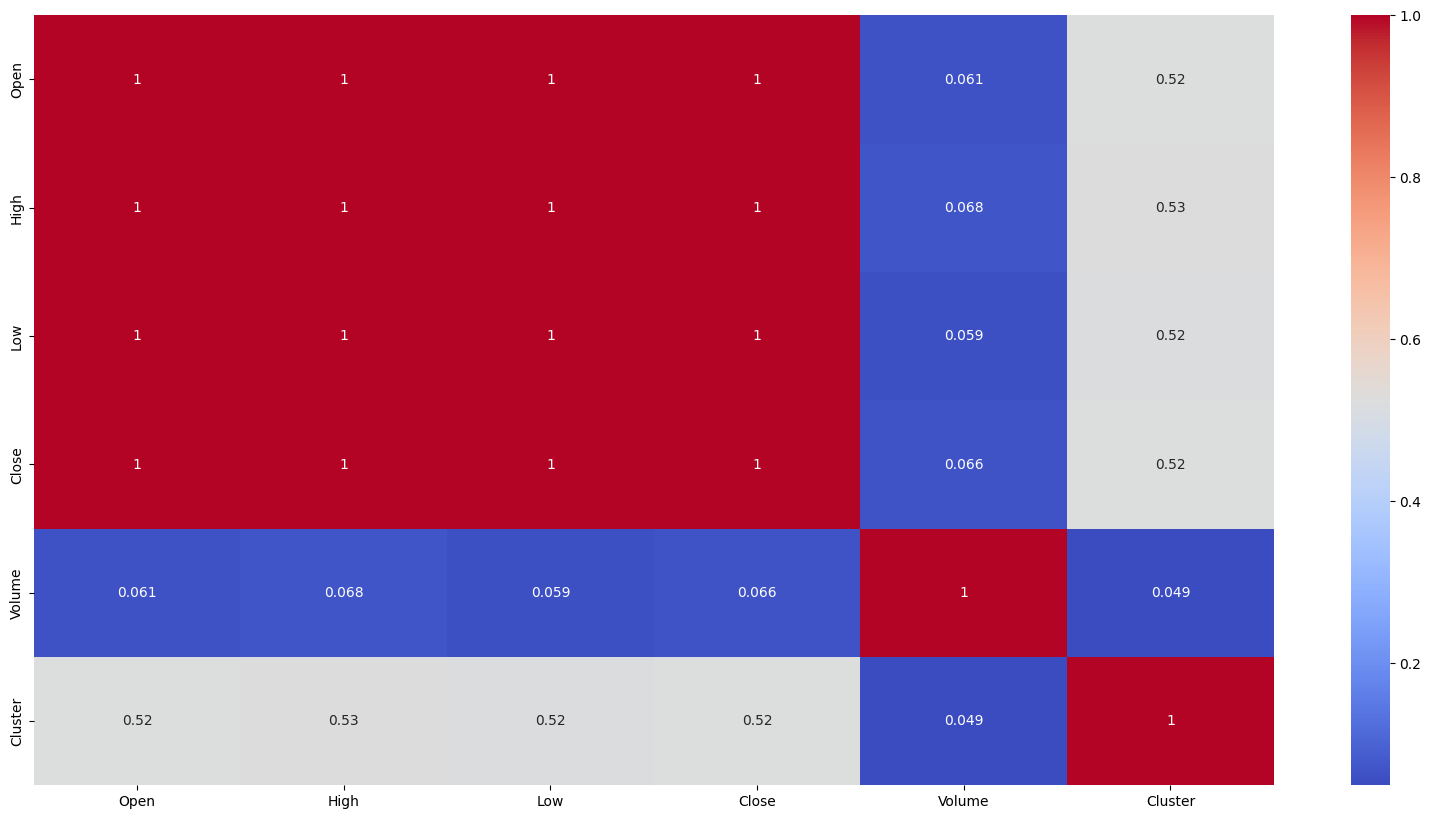

In [88]:
plt.figure(figsize = (20 ,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [93]:
df = df.drop_duplicates()
df[df.duplicated()]

,Date,Open,High,Low,Close,Volume,Cluster


In [94]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile

C:\Users\sudha\AppData\Local\Temp\ipykernel_2936\4001871067.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
df.Date= pd.to_datetime(df.Date,infer_datetime_format=True)
df2 =df.set_index('Date')

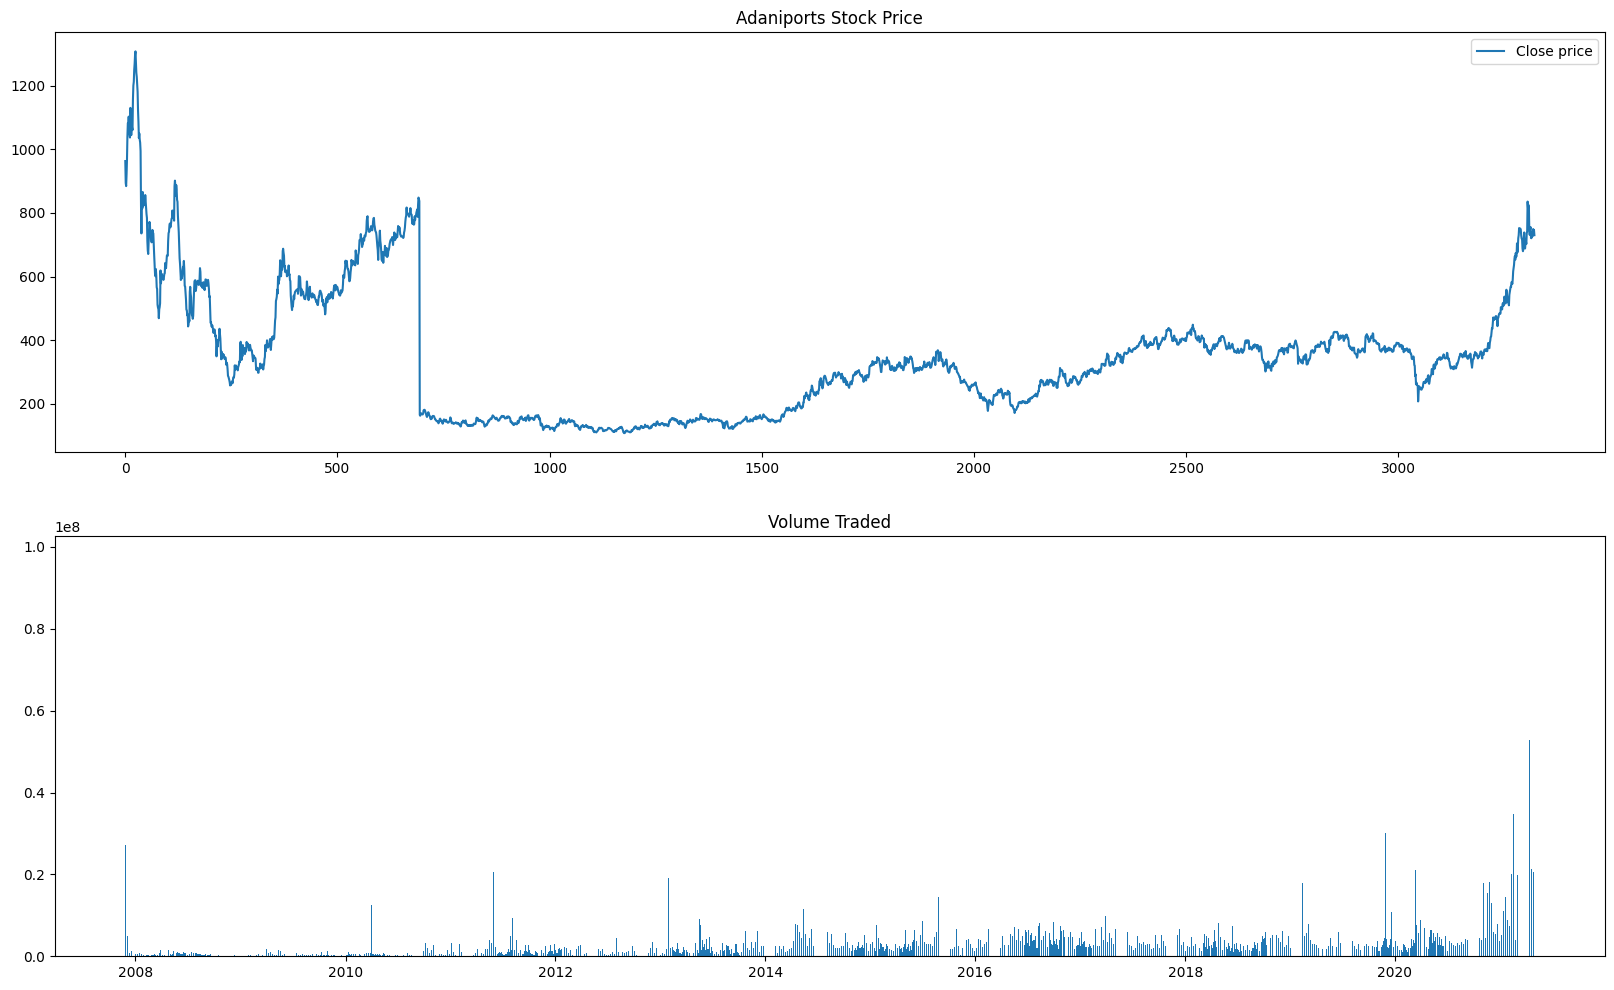

In [53]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Adaniports Stock Price')
plt.plot(df.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()

In [54]:
data = list(df2["Close"])

In [55]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -3.4730976831334255
2. P-Value :  0.008705487700678928
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 3316
5. Critical Values :
	 1% :  -3.4323235733856885
	 5% :  -2.862412008588944
	 10% :  -2.5672341879086087


In [56]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [57]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [58]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

3222 100


In [59]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28091.255, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28090.898, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28087.660, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28087.758, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28088.958, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=28089.370, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28089.336, Time=0.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=28091.309, Time=1.41 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=28085.716, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=28087.424, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=28087.392, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=28085.814, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=28089.364, Time=0.62 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 7.306 seconds
         

In [60]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [61]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3322
Model:                 ARIMA(5, 2, 0)   Log Likelihood              -14278.899
Date:                Fri, 30 Jun 2023   AIC                          28569.799
Time:                        10:07:38   BIC                          28606.445
Sample:                             0   HQIC                         28582.913
                               - 3322                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7962      0.003   -239.915      0.000      -0.803      -0.790
ar.L2         -0.6269      0.004   -143.411      0.000      -0.635      -0.618
ar.L3         -0.4606      0.005    -91.707      0.000      -0.470      -0.451
ar.L4         -0.3651      0.005    -81.009      0.000      -0.374      -0.356
ar.L5         -0.1852      0.003    -53.453      0.000      -0.192      -0.178
sigma2       318.5157      0.490    650.577      0.000     317.556     319.475
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):          53091556.93
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                           -15.35
Prob(H) (two-sided):                  0.00   Kurtosis:                       621.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([448.88397127, 443.17476614, 462.83206305, 481.59875305,
       472.30808969, 469.53609975, 475.66192013, 472.3740509 ,
       469.40971718, 476.1387154 , 478.03727282, 468.11698068,
       461.13059368, 440.00178655, 470.49715753, 470.27729251,
       480.48638461, 484.31883756, 486.57515433, 492.25489197,
       485.99722972, 510.32952968, 502.11013921, 502.23960163,
       497.52403205, 519.80548055, 522.97264752, 508.8836413 ,
       512.15415841, 543.75777949, 544.69159667, 529.69289471,
       512.83499878, 537.85725379, 568.61604673, 549.90934737,
       533.56580609, 520.61861119, 520.64360284, 517.99416298,
       501.70806607, 543.09743205, 553.38458296, 567.11052607,
       574.51735618, 574.57993639, 594.71898356, 588.20212265,
       581.38053687, 596.74599645, 625.77508887, 638.99777804,
       644.84284241, 667.12560295, 678.75113095, 663.37663577,
       683.01329874, 667.15509412, 671.26952671, 712.42824979,
       677.83477152, 699.99802655, 726.40910109, 744.16

In [63]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2020-12-03    448.883971
2020-12-04    443.174766
2020-12-07    462.832063
2020-12-08    481.598753
2020-12-09    472.308090
                 ...    
2021-04-26    726.866640
2021-04-27    727.316982
2021-04-28    746.914648
2021-04-29    751.511307
2021-04-30    750.908591
Length: 100, dtype: float64

<Axes: xlabel='Date'>

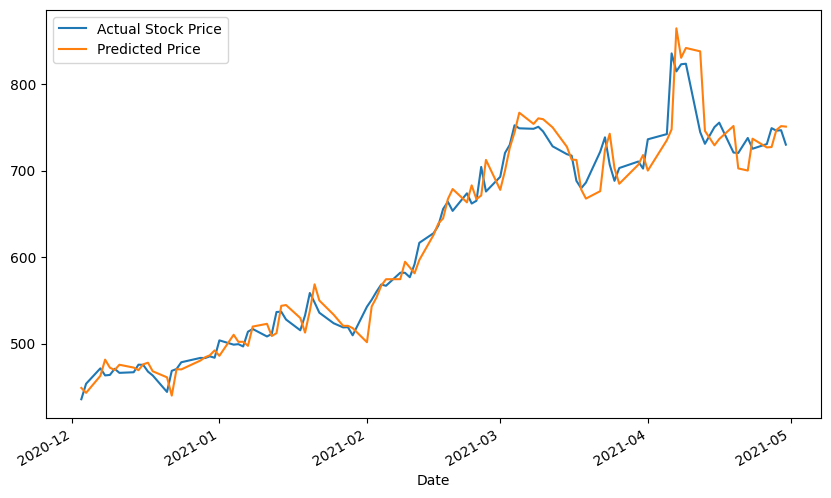

In [64]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

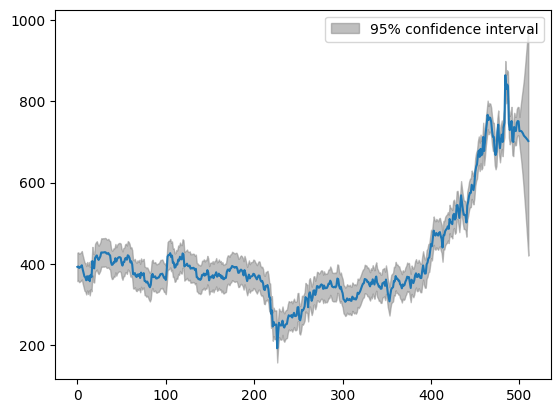

In [65]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

21.255145499424003

In [67]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9652327279853461

In [68]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([750.90859052, 726.67263409, 727.27287511, 726.98073432,
       724.41880188, 720.71246908, 715.83186723, 713.23830515,
       711.08102051, 708.52176642, 705.59623003])

In [69]:
import datetime
start_date = datetime.datetime(2021,5,1)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [70]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-05-01    750.908591
2021-05-02    726.672634
2021-05-03    727.272875
2021-05-04    726.980734
2021-05-05    724.418802
2021-05-06    720.712469
2021-05-07    715.831867
2021-05-08    713.238305
2021-05-09    711.081021
2021-05-10    708.521766
2021-05-11    705.596230
dtype: float64

<Axes: xlabel='Date'>

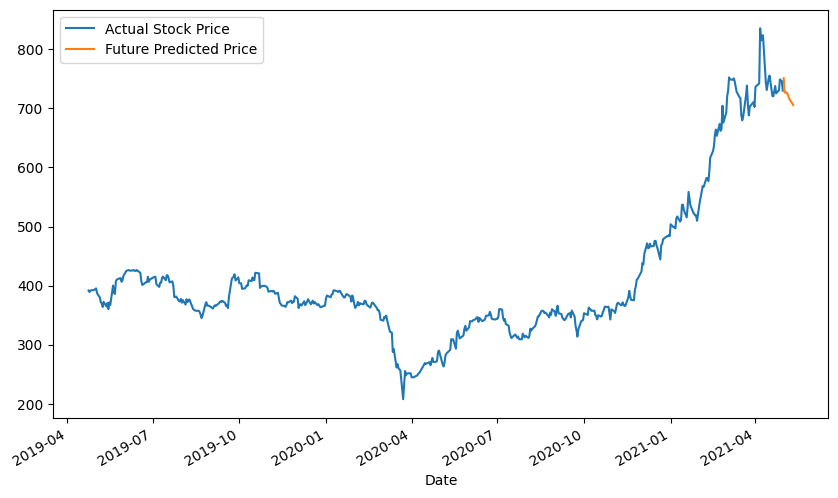

In [71]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-500:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [72]:
check_df = pd.read_csv("C:\\Users\\sudha\\Downloads\\salesdata.csv")

In [73]:
check_df.Date= pd.to_datetime(check_df.Date,infer_datetime_format=True)
check_df2 =check_df.set_index('Date')

In [74]:
check_df2

,Open,High,Low,Close,Volume
Date,,,,,
2007-11-27,770.00,1050.00,770.00,962.90,27294366
2007-11-28,984.00,990.00,874.00,893.90,4581338
2007-11-29,909.00,914.75,841.00,884.20,5124121
2007-11-30,890.00,958.00,890.00,921.55,4609762
2007-12-03,939.75,995.00,922.00,969.30,2977470
...,...,...,...,...,...
2021-04-26,733.00,739.65,728.90,730.75,9390549
2021-04-27,735.00,757.50,727.35,749.15,20573107
2021-04-28,755.00,760.00,741.10,746.25,11156977


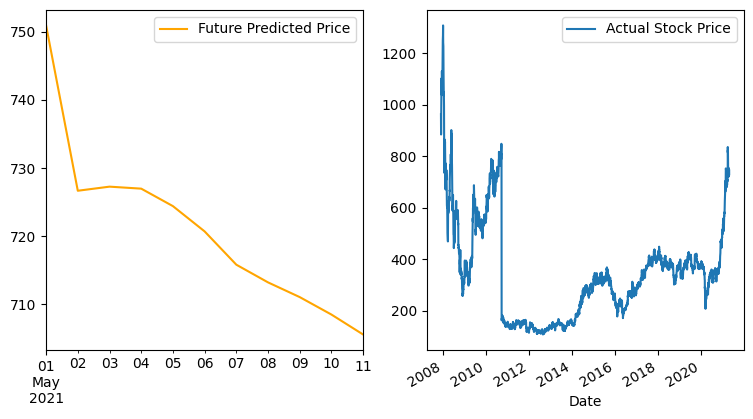

In [75]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df2['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()

In [76]:
#clustering
# Select the features for clustering

selected_features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [77]:
# Preprocess the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_features])

In [80]:
# Perform clustering using K-means
from sklearn.cluster import KMeans
k = 5  # Number of clusters
n_init = 10  # Number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
kmeans.fit(scaled_data)
print(scaled_data)

[[2.19657584 3.51679006 2.2924576  3.20541156 5.93131621]
 [3.302      3.21465687 2.84374826 2.84792978 0.39642522]
 [2.91458499 2.83573149 2.66881949 2.7976751  0.52869489]
 ...
 [2.11909284 2.05647962 2.1392624  2.08297057 1.99882914]
 [2.10979488 2.08593761 2.15145441 2.08556102 2.65555181]
 [2.03644431 2.05371007 2.05126793 1.99904007 2.35070405]]


In [85]:
# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

In [86]:
# Perform classificatipn on the clustered data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X = scaled_data
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
log_reg = LogisticRegression(max_iter = 150)
log_reg.fit(X_train, y_train)
#Predictions
y_pred = log_reg.predict(X_test)
#Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[328   0   0   1   0]
 [  2 208   0   0   0]
 [  0   0   9   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  14]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       329
           1       1.00      0.99      1.00       210
           2       1.00      1.00      1.00         9
           3       0.99      1.00      1.00       103
           4       1.00      1.00      1.00        14

    accuracy                           1.00       665
   macro avg       1.00      1.00      1.00       665
weighted avg       1.00      1.00      1.00       665



In [101]:
def predict(test):
 test = scaler.transform(test)
 return log_reg.predict(test)
Open = input('Open:')
High = int(input("High:"))
Low = int(input("Low:"))
Close = float(input("Close:"))
Volume = int(input("Volume:"))
cluster = predict(pd.DataFrame({'Open':[Open],'High' :[High] , 'Low':[Low],'Close':[Close],'Volume':[Volume]}))
print(f' {Open} belongs to cluster :{cluster[0]}')

Open:770
High:1050
Low:770
Close:962
Volume:27294366
 770 belongs to cluster :4


In [38]:
# Visualize the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

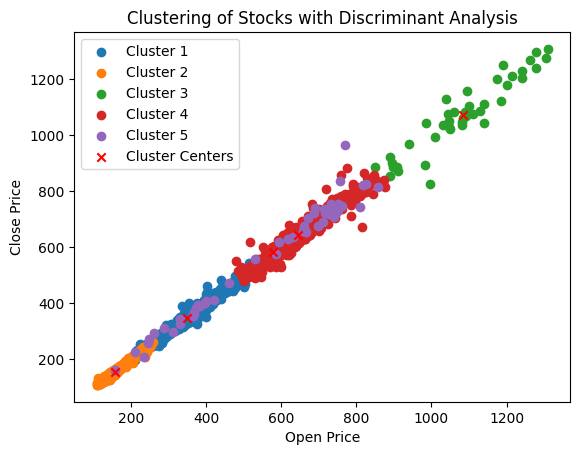

In [39]:
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Open'], cluster_data['Close'], label=f'Cluster {i+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 3], marker='x', color='red', label='Cluster Centers')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Clustering of Stocks with Discriminant Analysis')
plt.legend()
plt.show()